This notebook demonstrates the functionality of CCL in the mu / Sigma parametrization of modified gravity.

In [1]:
import pyccl as ccl
import numpy as np
import matplotlib.pyplot as plt



First set some default cosmological parameters.


In [2]:
Omega_c = 0.25; Omega_b = 0.05; h = 0.7; A_s = 2.1e-9; n_s = 0.96; Neff = 3.046; m_nu = 0.

Set up some different mu_0 / Sigma_0 pairs.

In [3]:
mu_0 = [0.3, -0.3, 0.3, -0.3]
sigma_0 = [0.3, -0.3, -0.3, 0.3]

Set up the cosmology objects, including one where mu_0 = sigma_0 = 0, the GR case. We set the matter power spectrum type to linear the mu / Sigma parameterisation only supports linear scales. 

In [4]:
cosmo_GR = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h, A_s = A_s, n_s = n_s, 
                         Neff = Neff, m_nu = m_nu, matter_power_spectrum='linear')

cosmo_1 = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h, A_s = A_s, n_s = n_s, 
                         Neff = Neff, m_nu = m_nu, mu_0 = mu_0[0], sigma_0 = sigma_0[0],
                        matter_power_spectrum='linear')

cosmo_2 = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h, A_s = A_s, n_s = n_s, 
                         Neff = Neff, m_nu = m_nu, mu_0 = mu_0[1], sigma_0 = sigma_0[1], 
                        matter_power_spectrum='linear')

cosmo_3 = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h, A_s = A_s, n_s = n_s, 
                         Neff = Neff, m_nu = m_nu, mu_0 = mu_0[2], sigma_0 = sigma_0[2], 
                        matter_power_spectrum='linear')

cosmo_4 = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h, A_s = A_s, n_s = n_s, 
                         Neff = Neff, m_nu = m_nu, mu_0 = mu_0[3], sigma_0 = sigma_0[3], 
                       matter_power_spectrum='linear')

Compute the growth factors (unnormalized so our intuition wrt GR will be correct).

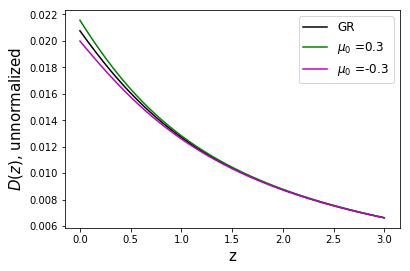

In [5]:
z = np.linspace(0., 3., 600)
a = 1. / (1. + z)

# We only plot models 1 and 2 because the growth factor is unaffected by Sigma, so 3 and 4 are res
D_GR = ccl.growth_factor_unnorm(cosmo_GR, a)
D_1 = ccl.growth_factor_unnorm(cosmo_1, a)
D_2 = ccl.growth_factor_unnorm(cosmo_2, a)

plt.figure()
plt.plot(z, D_GR, 'k', label='GR')
plt.plot(z, D_1, 'g', label='$\mu_0$ ='+str(mu_0[0]))
plt.plot(z, D_2, 'm', label='$\mu_0$ ='+str(mu_0[1]))
plt.xlabel('z', fontsize=15)
plt.ylabel('$D(z)$, unnormalized', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Compute the linear matter power spectrum (support for this parameterisation is limited to the linear regime). Again, the matter power spectrum is only affected by $\mu_0$, not $\Sigma_0$.

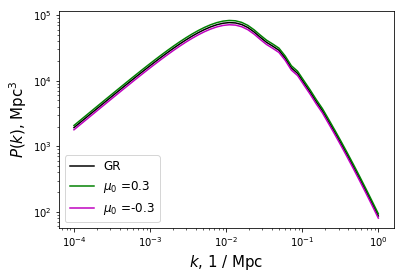

In [6]:
k = np.logspace(-4, 0) # 1 / Mpc units

Pk_GR = ccl.linear_matter_power(cosmo_GR, k, a=1.)
Pk_1 = ccl.linear_matter_power(cosmo_1, k, a=1.)
Pk_2 = ccl.linear_matter_power(cosmo_2, k, a=1.)

plt.figure()
plt.loglog(k, Pk_GR, 'k', label='GR')
plt.loglog(k, Pk_1, 'g', label='$\mu_0$ ='+str(mu_0[0]))
plt.loglog(k, Pk_2, 'm', label='$\mu_0$ ='+str(mu_0[1]))
plt.xlabel('$k$, 1 / Mpc', fontsize = 15)
plt.ylabel('$P(k)$, ${\\rm Mpc}^3$', fontsize=15)
plt.legend(fontsize=12)
plt.show()

And in real space, get the 3D correlation function of matter, $\xi(r)$.

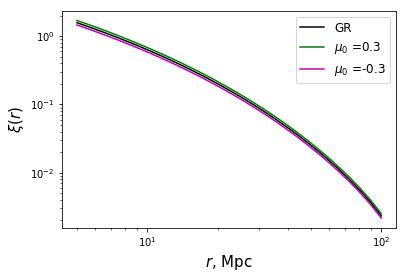

In [7]:
r = np.logspace(np.log10(5), np.log10(100), 30) # Mpc

corr_GR = ccl.correlation_3d(cosmo_GR, a=1., r=r)
corr_1 = ccl.correlation_3d(cosmo_1, a=1., r=r)
corr_2 = ccl.correlation_3d(cosmo_2, a=1., r=r)

plt.figure()
plt.loglog(r, corr_GR, 'k', label='GR')
plt.loglog(r, corr_1, 'g', label='$\mu_0$ ='+str(mu_0[0]))
plt.loglog(r, corr_2, 'm', label='$\mu_0$ ='+str(mu_0[1]))
plt.xlabel('$r$, Mpc', fontsize = 15)
plt.ylabel('$\\xi(r)$', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Compute the lensing $C_\ell$ values. This requires some more setup. We need some redshift distributions.

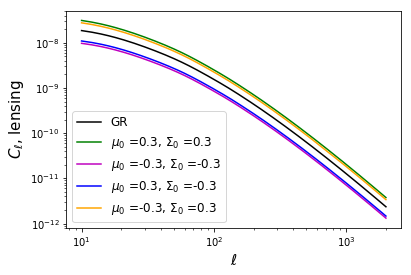

In [8]:
# Number density input
n = np.exp(-((z-0.5)/0.1)**2)
        
# ell range input
ell = np.arange(10, 2000)
     
# ClTracer objects
lens_GR = ccl.WeakLensingTracer(cosmo_GR, dndz=(z,n))
lens_1 = ccl.WeakLensingTracer(cosmo_1, dndz=(z,n))
lens_2 = ccl.WeakLensingTracer(cosmo_2, dndz=(z,n))
lens_3 = ccl.WeakLensingTracer(cosmo_3, dndz=(z,n))
lens_4 = ccl.WeakLensingTracer(cosmo_4, dndz=(z,n))

Cl_lensing_GR = ccl.angular_cl(cosmo_GR, lens_GR, lens_GR, ell)
Cl_lensing_1 = ccl.angular_cl(cosmo_1, lens_1, lens_1, ell)
Cl_lensing_2 = ccl.angular_cl(cosmo_2, lens_2, lens_2, ell)
Cl_lensing_3 = ccl.angular_cl(cosmo_3, lens_3, lens_3, ell)
Cl_lensing_4 = ccl.angular_cl(cosmo_4, lens_4, lens_4, ell)

plt.figure()
plt.loglog(ell, Cl_lensing_GR, 'k', label='GR')
plt.loglog(ell, Cl_lensing_1, 'g', label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0]))
plt.loglog(ell, Cl_lensing_2, 'm', label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1]))
plt.loglog(ell, Cl_lensing_3, 'b', label='$\mu_0$ ='+str(mu_0[2])+', $\Sigma_0$ =' + str(sigma_0[2]))
plt.loglog(ell, Cl_lensing_4, color='#FFA500', label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3]))
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, lensing', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Compute the galaxy clustering $C_\ell$ values. With magnification turned off, this is independent of $\Sigma_0$.

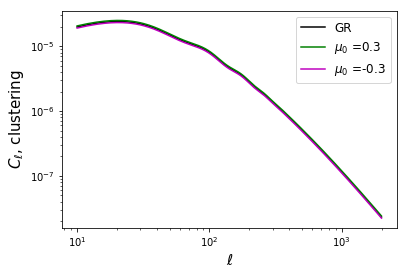

In [11]:
# Bias input
b = np.sqrt(1. + z)

# ClTracer objects
nc_GR = ccl.NumberCountsTracer(cosmo_GR, has_rsd=False, dndz=(z,n), bias=(z,b))
nc_1 = ccl.NumberCountsTracer(cosmo_1, has_rsd=False, dndz=(z,n), bias=(z,b))
nc_2 = ccl.NumberCountsTracer(cosmo_2, has_rsd=False, dndz=(z,n), bias=(z,b))

Cl_nc_GR = ccl.angular_cl(cosmo_GR, nc_GR, nc_GR, ell)
Cl_nc_1 = ccl.angular_cl(cosmo_1, nc_1, nc_1, ell)
Cl_nc_2 = ccl.angular_cl(cosmo_2, nc_2, nc_2, ell)

plt.figure()
plt.loglog(ell, Cl_nc_GR, 'k', label='GR')
plt.loglog(ell, Cl_nc_1, 'g', label='$\mu_0$ ='+str(mu_0[0]))
plt.loglog(ell, Cl_nc_2, 'm', label='$\mu_0$ ='+str(mu_0[1]))
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, clustering', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Compute the $C_\ell$ for the CMB lensing.

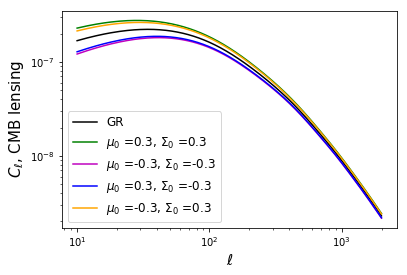

In [18]:
# Cl Tracer objects
cmbl_GR = ccl.CMBLensingTracer(cosmo_GR,1089.)
cmbl_1 = ccl.CMBLensingTracer(cosmo_1,1089.)
cmbl_2 = ccl.CMBLensingTracer(cosmo_2,1089.)
cmbl_3 = ccl.CMBLensingTracer(cosmo_3,1089.)
cmbl_4 = ccl.CMBLensingTracer(cosmo_4,1089.)

Cl_cmb_GR = ccl.angular_cl(cosmo_GR, cmbl_GR, cmbl_GR, ell)
Cl_cmb_1 = ccl.angular_cl(cosmo_1, cmbl_1, cmbl_1, ell)
Cl_cmb_2 = ccl.angular_cl(cosmo_2, cmbl_2, cmbl_2, ell)
Cl_cmb_3 = ccl.angular_cl(cosmo_3, cmbl_3, cmbl_3, ell)
Cl_cmb_4 = ccl.angular_cl(cosmo_4, cmbl_4, cmbl_4, ell)

plt.figure()
plt.loglog(ell, Cl_cmb_GR, 'k', label='GR')
plt.loglog(ell, Cl_cmb_1, 'g', label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0]))
plt.loglog(ell, Cl_cmb_2, 'm', label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1]))
plt.loglog(ell, Cl_cmb_3, 'b', label='$\mu_0$ ='+str(mu_0[2])+', $\Sigma_0$ =' + str(sigma_0[2]))
plt.loglog(ell, Cl_cmb_4, color='#FFA500', label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3]))
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, CMB lensing', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Now compute the 2D correlation functions for each of these.

Lensing first ($\xi_+$ and $\xi_-$):

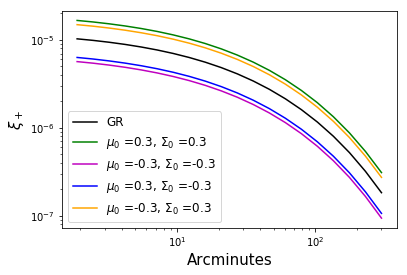

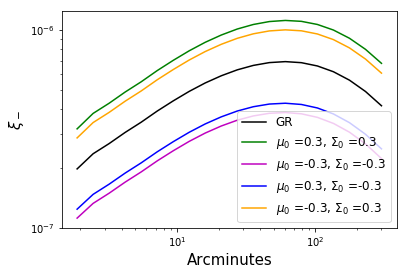

In [19]:


theta = np.logspace(-1.5, np.log10(5), 20) # In degrees

xi_p_GR = ccl.correlation(cosmo_GR, ell, Cl_lensing_GR, theta, corr_type='L+', method='fftlog')
xi_p_1 = ccl.correlation(cosmo_1, ell, Cl_lensing_1, theta, corr_type='L+', method='fftlog')
xi_p_2 = ccl.correlation(cosmo_2, ell, Cl_lensing_2, theta, corr_type='L+', method='fftlog')
xi_p_3 = ccl.correlation(cosmo_3, ell, Cl_lensing_3, theta, corr_type='L+', method='fftlog')
xi_p_4 = ccl.correlation(cosmo_4, ell, Cl_lensing_4, theta, corr_type='L+', method='fftlog')

xi_m_GR = ccl.correlation(cosmo_GR, ell, Cl_lensing_GR, theta, corr_type='L-', method='fftlog')
xi_m_1 = ccl.correlation(cosmo_1, ell, Cl_lensing_1, theta, corr_type='L-', method='fftlog')
xi_m_2 = ccl.correlation(cosmo_2, ell, Cl_lensing_2, theta, corr_type='L-', method='fftlog')
xi_m_3 = ccl.correlation(cosmo_3, ell, Cl_lensing_3, theta, corr_type='L-', method='fftlog')
xi_m_4 = ccl.correlation(cosmo_4, ell, Cl_lensing_4, theta, corr_type='L-', method='fftlog')

theta_amin = theta * 60. # In arcminutes.

plt.figure()
plt.loglog(theta_amin, xi_p_GR, 'k', label='GR')
plt.loglog(theta_amin, xi_p_1, 'g', label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0]))
plt.loglog(theta_amin, xi_p_2, 'm', label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1]))
plt.loglog(theta_amin, xi_p_3, 'b', label='$\mu_0$ ='+str(mu_0[2])+', $\Sigma_0$ =' + str(sigma_0[2]))
plt.loglog(theta_amin, xi_p_4, color='#FFA500', label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3]))
plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$\\xi_+$', fontsize=15)
plt.show()

plt.figure()
plt.loglog(theta_amin, xi_m_GR, 'k', label='GR')
plt.loglog(theta_amin, xi_m_1, 'g', label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0]))
plt.loglog(theta_amin, xi_m_2, 'm', label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1]))
plt.loglog(theta_amin, xi_m_3, 'b', label='$\mu_0$ ='+str(mu_0[2])+', $\Sigma_0$ =' + str(sigma_0[2]))
plt.loglog(theta_amin, xi_m_4, color='#FFA500', label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3]))
plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$\\xi_-$', fontsize=15)
plt.show()



Now, $w(\theta)$ for galaxy clustering. Again, because there is no magnification, this is insensitive to $\Sigma_0$.

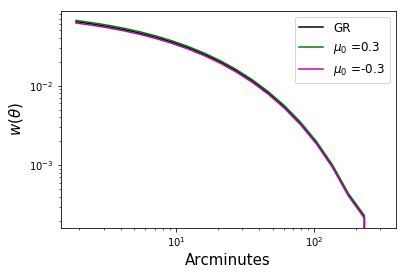

In [20]:
w_GR = ccl.correlation(cosmo_GR, ell, Cl_nc_GR, theta, corr_type='gg', method='fftlog')
w_1 = ccl.correlation(cosmo_1, ell, Cl_nc_1, theta, corr_type='gg', method='fftlog')
w_2 = ccl.correlation(cosmo_2, ell, Cl_nc_2, theta, corr_type='gg', method='fftlog')

plt.figure()
plt.loglog(theta_amin, w_GR, 'k', label='GR')
plt.loglog(theta_amin, w_1, 'g', label='$\mu_0$ ='+str(mu_0[0]))
plt.loglog(theta_amin, w_2, 'm', label='$\mu_0$ ='+str(mu_0[1]))
plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$w(\\theta)$', fontsize=15)
plt.show()